In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import datetime

In [137]:
df_ = pd.read_excel("Book2.xlsx", sheet_name="deneme")
df = df_.copy()

In [138]:
df.head()

,Order_ID,Order_Date,Customer_ID,State,Product_ID,Product_Name,Quantity,Price
0,CA-2017-137456,2017-12-21,RB-19465,Nebraska,FUR-FU-10004351,Staple-based wall hangings,2,5.844
1,CA-2017-158967,2017-12-10,BT-11680,Florida,FUR-FU-10004351,Staple-based wall hangings,3,3.896
2,CA-2017-118017,2017-12-03,LC-16870,Colorado,OFF-AR-10003856,Newell 344,6,1.390
3,CA-2017-118017,2017-12-03,LC-16870,Colorado,TEC-AC-10002006,Memorex Micro Travel Drive 16 GB,6,10.660
4,CA-2017-118017,2017-12-03,LC-16870,Colorado,TEC-AC-10002006,Memorex Micro Travel Drive 16 GB,8,7.995


In [139]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'State', 'Product_ID',
       'Product_Name', 'Quantity', 'Price'],
      dtype='object')

In [140]:
df.index

RangeIndex(start=0, stop=116, step=1)

In [141]:
df.isnull().sum()

Order_ID        0
Order_Date      0
Customer_ID     0
State           0
Product_ID      0
Product_Name    0
Quantity        0
Price           0
dtype: int64

In [142]:
df.describe()

,Order_Date,Quantity,Price
count,116,116.000000,116.000000
mean,2016-12-05 21:55:51.724137984,3.965517,80.159548
min,2014-07-25 00:00:00,1.000000,0.141429
25%,2016-03-01 00:00:00,2.000000,3.896000
50%,2017-01-24 00:00:00,3.000000,18.995600
75%,2017-12-22 00:00:00,5.000000,92.934875
max,2017-12-28 00:00:00,13.000000,1637.530000
std,NaN,2.321660,186.689222


In [143]:
df.dtypes

Order_ID                object
Order_Date      datetime64[ns]
Customer_ID             object
State                   object
Product_ID              object
Product_Name            object
Quantity                 int64
Price                  float64
dtype: object

In [144]:
df["State"].value_counts()

State
California       19
New York         18
Illinois         12
Texas             9
Colorado          9
Tennessee         8
Ohio              7
Minnesota         5
Alabama           4
Massachusetts     4
Washington        4
Michigan          3
Florida           2
North Dakota      2
New Mexico        2
Kentucky          2
Nebraska          2
Missouri          1
New Jersey        1
Pennsylvania      1
Iowa              1
Name: count, dtype: int64

In [145]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

In [146]:
df.head()

,Order_ID,Order_Date,Customer_ID,State,Product_ID,Product_Name,Quantity,Price
0,CA-2017-137456,2017-12-21,RB-19465,Nebraska,FUR-FU-10004351,Staple-based wall hangings,2,5.844
1,CA-2017-158967,2017-12-10,BT-11680,Florida,FUR-FU-10004351,Staple-based wall hangings,3,3.896
2,CA-2017-118017,2017-12-03,LC-16870,Colorado,OFF-AR-10003856,Newell 344,6,1.390
3,CA-2017-118017,2017-12-03,LC-16870,Colorado,TEC-AC-10002006,Memorex Micro Travel Drive 16 GB,6,10.660
4,CA-2017-118017,2017-12-03,LC-16870,Colorado,TEC-AC-10002006,Memorex Micro Travel Drive 16 GB,8,7.995


In [147]:
order_id = df.groupby("Product_ID").agg({"Quantity":"sum"}).sort_values(by="Quantity", ascending=False).reset_index()
order_id.head(15)

,Product_ID,Quantity
0,FUR-FU-10004351,62
1,FUR-TA-10001095,61
2,TEC-AC-10002006,14
3,OFF-FA-10003485,13
4,OFF-ST-10000078,9
5,TEC-PH-10000560,8
6,OFF-AP-10004249,8
7,TEC-AC-10004518,8
8,OFF-BI-10000343,7
9,OFF-SU-10004782,7


In [148]:
order_id.iloc[0, 0]
type(order_id)

pandas.core.frame.DataFrame

In [149]:
selectProductID = order_id[order_id["Quantity"] == 86].iloc[0,0]
selectProductID

IndexError: index 0 is out of bounds for axis 0 with size 0

In [150]:
max_orderIDs = df[df["Product_ID"] == order_id.iloc[0, 0]]["Order_ID"] #En fazla satılan ürüne ait Order_ID'ler

In [151]:
orderIDs = df[df["Product_ID"].isin(["FUR-FU-10004351","FUR-TA-10001095"])]["Order_ID"] #9 ve 10 product id

In [177]:
deneme = df[df["Order_ID"].isin(orderIDs)]

In [178]:
deneme.to_csv("deneme.csv")

In [179]:
df["State"].value_counts()

State
California       19
New York         18
Illinois         12
Texas             9
Colorado          9
Tennessee         8
Ohio              7
Minnesota         5
Alabama           4
Massachusetts     4
Washington        4
Michigan          3
Florida           2
North Dakota      2
New Mexico        2
Kentucky          2
Nebraska          2
Missouri          1
New Jersey        1
Pennsylvania      1
Iowa              1
Name: count, dtype: int64

In [180]:
#df1 = df[df["Order_ID"].isin(max_orderIDs)]
df1 = df[df["State"] == "California"]

In [181]:
df1.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'State', 'Product_ID',
       'Product_Name', 'Quantity', 'Price'],
      dtype='object')

In [182]:
#df1 = df[df["State"] == "New York"]

In [183]:
df1.head()

,Order_ID,Order_Date,Customer_ID,State,Product_ID,Product_Name,Quantity,Price
10,US-2017-105998,2017-11-03,CR-12580,California,TEC-AC-10004469,Microsoft Sculpt Comfort Mouse,5,15.980000
11,US-2017-105998,2017-11-03,CR-12580,California,FUR-TA-10001095,Chromcraft Round Conference Tables,12,31.953167
12,CA-2017-105921,2017-08-14,JM-15250,California,FUR-TA-10001095,Chromcraft Round Conference Tables,3,127.812667
25,CA-2017-124436,2017-03-19,SA-20830,California,OFF-BI-10001553,SpineVue Locking Slant-D Ring Binders by Cardinal,2,6.855000
26,CA-2017-124436,2017-03-19,SA-20830,California,FUR-TA-10001095,Chromcraft Round Conference Tables,5,76.687600


In [184]:
df1.describe()

,Order_Date,Quantity,Price
count,19,19.000000,19.000000
mean,2016-04-03 10:06:18.947368448,4.631579,129.269866
min,2014-07-25 00:00:00,1.000000,0.420857
25%,2014-11-25 00:00:00,3.000000,3.912000
50%,2016-02-05 00:00:00,4.000000,31.953167
75%,2017-03-19 00:00:00,5.500000,86.273550
max,2017-12-28 00:00:00,12.000000,1637.530000
std,NaN,2.476793,368.978338


In [185]:
df1.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'State', 'Product_ID',
       'Product_Name', 'Quantity', 'Price'],
      dtype='object')

In [186]:
df1.dtypes

Order_ID                object
Order_Date      datetime64[ns]
Customer_ID             object
State                   object
Product_ID              object
Product_Name            object
Quantity                 int64
Price                  float64
dtype: object

In [187]:
basket = pd.pivot_table(data=df, index="Order_ID", columns="Product_ID", values="Quantity", aggfunc="count", fill_value=0)

In [188]:
basket.head()

Product_ID,FUR-AY-10004270,FUR-AZ-10001146,FUR-BO-10004015,FUR-CH-10002084,FUR-CH-10003968,FUR-CH-10004698,FUR-FU-10000320,FUR-FU-10000576,FUR-FU-10000747,FUR-FU-10001185,...,TEC-CO-10001571,TEC-MA-10000488,TEC-MA-10003979,TEC-PH-10000011,TEC-PH-10000193,TEC-PH-10000560,TEC-PH-10000576,TEC-PH-10001051,TEC-PH-10001448,TEC-PH-10002890
Order_ID,,,,,,,,,,,,,,,,,,,,,
CA-2014-120544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA-2014-143917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA-2014-164721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA-2015-114048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA-2015-121783,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [189]:
basket.tail()

Product_ID,FUR-AY-10004270,FUR-AZ-10001146,FUR-BO-10004015,FUR-CH-10002084,FUR-CH-10003968,FUR-CH-10004698,FUR-FU-10000320,FUR-FU-10000576,FUR-FU-10000747,FUR-FU-10001185,...,TEC-CO-10001571,TEC-MA-10000488,TEC-MA-10003979,TEC-PH-10000011,TEC-PH-10000193,TEC-PH-10000560,TEC-PH-10000576,TEC-PH-10001051,TEC-PH-10001448,TEC-PH-10002890
Order_ID,,,,,,,,,,,,,,,,,,,,,
US-2016-143819,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
US-2017-105998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US-2017-106705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US-2017-147669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US-2017-162068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
basket.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [191]:
basket= basket.astype(bool)

In [192]:
print(basket.dtypes)

Product_ID
FUR-AY-10004270    bool
FUR-AZ-10001146    bool
FUR-BO-10004015    bool
FUR-CH-10002084    bool
FUR-CH-10003968    bool
                   ... 
TEC-PH-10000560    bool
TEC-PH-10000576    bool
TEC-PH-10001051    bool
TEC-PH-10001448    bool
TEC-PH-10002890    bool
Length: 87, dtype: object


In [193]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [194]:
df2 = apriori(basket, min_support=0.01, use_colnames = True)

In [195]:
df2.head()

,support,itemsets
0,0.022222,(FUR-AY-10004270)
1,0.022222,(FUR-AZ-10001146)
2,0.022222,(FUR-BO-10004015)
3,0.022222,(FUR-CH-10002084)
4,0.022222,(FUR-CH-10003968)


In [196]:
association_rules(df2, metric = "confidence", min_threshold = 0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(FUR-AY-10004270),(FUR-FU-10004053),0.022222,0.022222,0.022222,1.0,45.0000,0.021728,inf,1.000000
1,(FUR-FU-10004053),(FUR-AY-10004270),0.022222,0.022222,0.022222,1.0,45.0000,0.021728,inf,1.000000
2,(FUR-AY-10004270),(FUR-FU-10004351),0.022222,0.355556,0.022222,1.0,2.8125,0.014321,inf,0.659091
3,(FUR-AY-10004270),(OFF-AR-10003856),0.022222,0.022222,0.022222,1.0,45.0000,0.021728,inf,1.000000
4,(OFF-AR-10003856),(FUR-AY-10004270),0.022222,0.022222,0.022222,1.0,45.0000,0.021728,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
6794,(OFF-PA-10000312),"(FUR-FU-10004351, OFF-AP-10004249, FUR-TA-1000...",0.022222,0.022222,0.022222,1.0,45.0000,0.021728,inf,1.000000
6795,(FUR-TA-10004152),"(FUR-FU-10004351, OFF-AP-10004249, OFF-PA-1000...",0.022222,0.022222,0.022222,1.0,45.0000,0.021728,inf,1.000000
6796,(TEC-PH-10001051),"(FUR-FU-10004351, OFF-AP-10004249, OFF-PA-1000...",0.022222,0.022222,0.022222,1.0,45.0000,0.021728,inf,1.000000
6797,(TEC-PH-10000560),"(FUR-FU-10004351, OFF-AP-10004249, OFF-PA-1000...",0.022222,0.022222,0.022222,1.0,45.0000,0.021728,inf,1.000000


In [174]:
df2.values

array([[0.022222222222222223, frozenset({'FUR-AY-10004270'})],
       [0.022222222222222223, frozenset({'FUR-AZ-10001146'})],
       [0.022222222222222223, frozenset({'FUR-BO-10004015'})],
       ...,
       [0.022222222222222223,
        frozenset({'FUR-FU-10004351', 'OFF-PA-10002246', 'TEC-AC-10002006', 'OFF-AR-10003856', 'FUR-AY-10004270', 'FUR-FU-10004053', 'OFF-SU-10004782'})],
       [0.022222222222222223,
        frozenset({'FUR-FU-10004351', 'OFF-PA-10003349', 'FUR-FU-10002505', 'FUR-FU-10000576', 'TEC-PH-10000011', 'OFF-AR-10004685', 'FUR-TA-10002607'})],
       [0.022222222222222223,
        frozenset({'FUR-FU-10004351', 'OFF-AP-10004249', 'OFF-PA-10000312', 'FUR-TA-10004152', 'TEC-PH-10001051', 'TEC-PH-10000560', 'OFF-ST-10001490'})]],
      dtype=object)

In [175]:
df2.to_csv("denemeOutput.csv")

In [176]:
df2["itemsets"].value_counts()

itemsets
(FUR-AY-10004270)                                                                                                          1
(TEC-MA-10000488, FUR-FU-10004351, FUR-CH-10002084, TEC-AC-10001767)                                                       1
(FUR-AY-10004270, FUR-FU-10004053, OFF-SU-10004782, OFF-PA-10002246)                                                       1
(FUR-AY-10004270, TEC-AC-10002006, FUR-FU-10004053, OFF-PA-10002246)                                                       1
(FUR-AY-10004270, TEC-AC-10002006, FUR-FU-10004053, OFF-SU-10004782)                                                       1
                                                                                                                          ..
(OFF-FA-10003059, OFF-PA-10004381)                                                                                         1
(OFF-FA-10003059, TEC-PH-10002890)                                                                                  

In [36]:
df2[df2["support"]> 0.03]

,support,itemsets


In [37]:
df2["itemsets"] = df2["itemsets"].astype(str)

In [38]:
df3 = df2["itemsets"].str.strip('()').str.split(', ', expand=True)

In [39]:
df3.columns

RangeIndex(start=0, stop=1, step=1)

In [40]:
df2.to_csv("df2son.csv")

In [41]:
df4 = pd.read_excel("Book2.xlsx", sheet_name="Sheet4")

In [42]:
#df4.to_csv("retail.csv")

<Axes: xlabel='Price'>

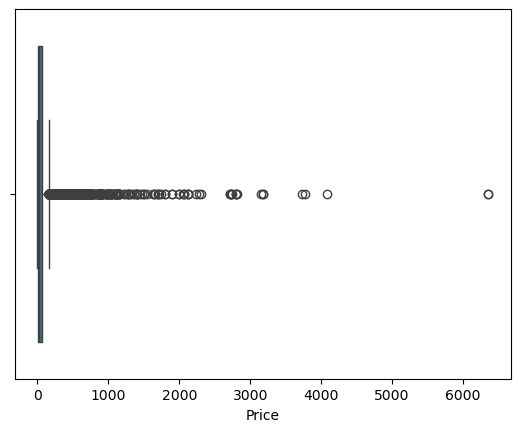

In [43]:
sns.boxplot(x="Price",data=df)